<a href="https://colab.research.google.com/github/rkukjk/Traffic-Sign-Classification-and-Recognition-/blob/main/trafficSignClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

We first have to load the image dataset (train and test both)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip '/content/drive/My Drive/trafficData.zip'

Streaming output truncated to the last 5000 lines.
  inflating: trafficData/train_dataset/train/M4/00700.jpg  
  inflating: __MACOSX/trafficData/train_dataset/train/M4/._00700.jpg  
  inflating: trafficData/train_dataset/train/M4/02117.jpg  
  inflating: __MACOSX/trafficData/train_dataset/train/M4/._02117.jpg  
  inflating: trafficData/train_dataset/train/M4/03209.jpg  
  inflating: __MACOSX/trafficData/train_dataset/train/M4/._03209.jpg  
  inflating: trafficData/train_dataset/train/M4/02498.jpg  
  inflating: __MACOSX/trafficData/train_dataset/train/M4/._02498.jpg  
  inflating: trafficData/train_dataset/train/M4/01191.jpg  
  inflating: __MACOSX/trafficData/train_dataset/train/M4/._01191.jpg  
  inflating: trafficData/train_dataset/train/M4/01185.jpg  
  inflating: __MACOSX/trafficData/train_dataset/train/M4/._01185.jpg  
  inflating: trafficData/train_dataset/train/M4/01813.jpg  
  inflating: __MACOSX/trafficData/train_dataset/train/M4/._01813.jpg  
  inflating: trafficData/train_d

The next step is to somehow use pandas to get the train.json file into a dataframe.

In [ ]:
import pandas as pd

trainLabelsDf = pd.read_json("/content/trafficData/train_dataset/train.json")

In [ ]:
trainLabelsDf

,annotations
0,"{'filename': 'train/W1/00082.jpg', 'label': 9}"
1,"{'filename': 'train/W1/00021.jpg', 'label': 9}"
2,"{'filename': 'train/W1/00135.jpg', 'label': 9}"
3,"{'filename': 'train/W1/00149.jpg', 'label': 9}"
4,"{'filename': 'train/W1/00008.jpg', 'label': 9}"
...,...
6019,"{'filename': 'train/GuideSign/01172.jpg', 'lab..."
6020,"{'filename': 'train/GuideSign/00361.jpg', 'lab..."
6021,"{'filename': 'train/GuideSign/00155.jpg', 'lab..."
6022,"{'filename': 'train/GuideSign/00535.jpg', 'lab..."


In [ ]:
firstDict = trainLabelsDf.iloc[0]

In [ ]:
firstDict = dict(firstDict)

In [ ]:
firstDict['annotations']['filename']

'train/W1/00082.jpg'

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline


image1 = plt.imread("/content/trafficData/train_dataset/train/W1/00001.jpg")

In [ ]:
image1.shape

(224, 224, 3)

In [ ]:
trainDf = pd.DataFrame()

In [ ]:
trainDf['image'] = []
trainDf['label'] = []

In [ ]:
trainLabelsDf.shape[0]

6024

We will try to grayscale all the images. My motivations for grayscaling images is due to this abstract:



Abstract: There is a common tendency in object recognition research to accumulate large volumes of image features to improve performance. ... Experimental results showed that classification with grayscale images resulted in higher accuracy classification than with RGB images across the different types of classifiers.

In [63]:
from keras.preprocessing import image
import numpy as np 
imageList = []
labelList = []

for i in range(trainLabelsDf.shape[0]):
  annotationDict = trainLabelsDf.iloc[i]
  annotationDict = dict(annotationDict)
  imageString = annotationDict['annotations']['filename']
  imageString = "/content/trafficData/train_dataset/" + imageString
  img = image.load_img(imageString)
  img = image.img_to_array(img)
  img = img/255
  img = np.mean(img, axis=2)
  imageList.append(img)
  currentLabel = annotationDict['annotations']['label']
  labelList.append(currentLabel)


  


In [64]:
imageList

[array([[0.23137255, 0.23137255, 0.23529412, ..., 0.20130719, 0.20130719,
         0.20130719],
        [0.23529412, 0.23529412, 0.23921569, ..., 0.20130719, 0.20130719,
         0.20130719],
        [0.23921569, 0.24313726, 0.24705882, ..., 0.20130719, 0.20130719,
         0.20130719],
        ...,
        [0.17124183, 0.17124183, 0.17124183, ..., 0.18300654, 0.18692811,
         0.19084968],
        [0.1751634 , 0.1751634 , 0.1751634 , ..., 0.18562092, 0.19346406,
         0.19738562],
        [0.1751634 , 0.1751634 , 0.1751634 , ..., 0.18954249, 0.19346406,
         0.19738562]], dtype=float32),
 array([[0.5163399 , 0.5163399 , 0.52026147, ..., 0.63137263, 0.62352943,
         0.61568636],
        [0.5163399 , 0.5163399 , 0.52026147, ..., 0.63137263, 0.62352943,
         0.61960787],
        [0.5163399 , 0.5163399 , 0.52026147, ..., 0.63137263, 0.62352943,
         0.61960787],
        ...,
        [0.2509804 , 0.2509804 , 0.2509804 , ..., 0.22352941, 0.21960784,
         0.21960784

In [65]:
len(imageList)

6024

In [66]:
len(labelList)

6024

In [67]:
trainDf = pd.DataFrame()

trainDf['image'] = imageList
trainDf['label'] = labelList

In [68]:
trainDf.head(3)

,image,label
0,"[[0.23137255, 0.23137255, 0.23529412, 0.243137...",9
1,"[[0.5163399, 0.5163399, 0.52026147, 0.52418303...",9
2,"[[0.6732026, 0.6732026, 0.6732026, 0.6732026, ...",9


Trying out the process of how to grayscale an image





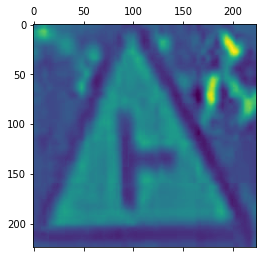

In [82]:
plt.matshow(trainDf.iloc[0][0]) # now the image is in grayscale

In [83]:
trainDf.iloc[0][0]

array([[0.23137255, 0.23137255, 0.23529412, ..., 0.20130719, 0.20130719,
        0.20130719],
       [0.23529412, 0.23529412, 0.23921569, ..., 0.20130719, 0.20130719,
        0.20130719],
       [0.23921569, 0.24313726, 0.24705882, ..., 0.20130719, 0.20130719,
        0.20130719],
       ...,
       [0.17124183, 0.17124183, 0.17124183, ..., 0.18300654, 0.18692811,
        0.19084968],
       [0.1751634 , 0.1751634 , 0.1751634 , ..., 0.18562092, 0.19346406,
        0.19738562],
       [0.1751634 , 0.1751634 , 0.1751634 , ..., 0.18954249, 0.19346406,
        0.19738562]], dtype=float32)

In [89]:
firstImage = trainDf.iloc[0][0]
firstImage

array([[0.23137255, 0.23137255, 0.23529412, ..., 0.20130719, 0.20130719,
        0.20130719],
       [0.23529412, 0.23529412, 0.23921569, ..., 0.20130719, 0.20130719,
        0.20130719],
       [0.23921569, 0.24313726, 0.24705882, ..., 0.20130719, 0.20130719,
        0.20130719],
       ...,
       [0.17124183, 0.17124183, 0.17124183, ..., 0.18300654, 0.18692811,
        0.19084968],
       [0.1751634 , 0.1751634 , 0.1751634 , ..., 0.18562092, 0.19346406,
        0.19738562],
       [0.1751634 , 0.1751634 , 0.1751634 , ..., 0.18954249, 0.19346406,
        0.19738562]], dtype=float32)

In [90]:
firstImageFlattened = firstImage.flatten() #essentially we are converting a 2D array into a 1D array

In [91]:
firstImageFlattened

array([0.23137255, 0.23137255, 0.23529412, ..., 0.18954249, 0.19346406,
       0.19738562], dtype=float32)

In [92]:
firstImageFlattened.shape

(50176,)

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
#from keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf

import cv2
import os

import numpy as np

In [96]:
# model = keras.Sequential([
#         keras.layers.Dense(100, input_shape=(50176,), activation="relu"),
#         keras.layers.Dense(10, activation="relu")
# ])

# model.compile(optimizer="adam", 
#               loss = "sparse_categorical_crossentropy",
#               metrics = ["accuracy"]
#               )


# model.fit(imageList,labelList, epochs=5)

In [101]:
for i in range(len(imageList)):
  img = imageList[i]
  flattenedImg = img.flatten()
  imageList[i] = flattenedImg

In [104]:
imageList = np.array(imageList)
labelList = np.array(labelList)

In [119]:
model = keras.Sequential([
        keras.layers.Dense(100, input_shape=(50176,), activation="sigmoid"),
        keras.layers.Dense(75, activation="relu"),
        keras.layers.Dense(25, activation="relu"),
        keras.layers.Dense(10, activation="sigmoid")
])

model.compile(optimizer="adam", 
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"],
              )


model.fit(imageList,labelList, epochs=5)

Epoch 1/5
189/189 [==============================] - 7s 35ms/step - loss: 1.5627 - accuracy: 0.5302
Epoch 2/5
189/189 [==============================] - 7s 35ms/step - loss: 1.5475 - accuracy: 0.5322
Epoch 3/5
189/189 [==============================] - 7s 35ms/step - loss: 1.5459 - accuracy: 0.5322
Epoch 4/5
189/189 [==============================] - 7s 35ms/step - loss: 1.5442 - accuracy: 0.5322
Epoch 5/5
189/189 [==============================] - 7s 34ms/step - loss: 1.5471 - accuracy: 0.5322
